In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

d= pd.read_csv("loan.csv")
print(d.head())


       ID Customer_ID      Month             Name  Age          SSN  \
0  0x160a   CUS_0xd40  September    Aaron Maashoh   23  821-00-0265   
1  0x160b   CUS_0xd40    October    Aaron Maashoh   24  821-00-0265   
2  0x160c   CUS_0xd40   November    Aaron Maashoh   24  821-00-0265   
3  0x160d   CUS_0xd40   December    Aaron Maashoh  24_  821-00-0265   
4  0x1616  CUS_0x21b1  September  Rick Rothackerj   28  004-07-5839   

  Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0  Scientist      19114.12            1824.843333                  3  ...   
1  Scientist      19114.12            1824.843333                  3  ...   
2  Scientist      19114.12            1824.843333                  3  ...   
3  Scientist      19114.12                    NaN                  3  ...   
4    _______      34847.84            3037.986667                  2  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0                2022.0      

In [5]:
d_cleaned=d.drop(columns=["ID","Customer_ID","Name"], errors="ignore")
d_cleaned=d_cleaned.drop_duplicates(subset=["SSN","Month"], keep="first")
d_cleaned.to_csv("d_cleaned.csv", index=False)
print(d_cleaned.head())

       Month  Age          SSN Occupation Annual_Income  \
0  September   23  821-00-0265  Scientist      19114.12   
1    October   24  821-00-0265  Scientist      19114.12   
2   November   24  821-00-0265  Scientist      19114.12   
3   December  24_  821-00-0265  Scientist      19114.12   
4  September   28  004-07-5839    _______      34847.84   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0            1824.843333                  3                4              3   
1            1824.843333                  3                4              3   
2            1824.843333                  3                4              3   
3                    NaN                  3                4              3   
4            3037.986667                  2                4              6   

  Num_of_Loan  ... Num_Credit_Inquiries  Credit_Mix Outstanding_Debt  \
0           4  ...               2022.0        Good           809.98   
1           4  ...        

In [6]:
dc=pd.read_csv("d_cleaned.csv")
print(dc.head())

       Month  Age          SSN Occupation Annual_Income  \
0  September   23  821-00-0265  Scientist      19114.12   
1    October   24  821-00-0265  Scientist      19114.12   
2   November   24  821-00-0265  Scientist      19114.12   
3   December  24_  821-00-0265  Scientist      19114.12   
4  September   28  004-07-5839    _______      34847.84   

   Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0            1824.843333                  3                4              3   
1            1824.843333                  3                4              3   
2            1824.843333                  3                4              3   
3                    NaN                  3                4              3   
4            3037.986667                  2                4              6   

  Num_of_Loan  ... Num_Credit_Inquiries  Credit_Mix Outstanding_Debt  \
0           4  ...               2022.0        Good           809.98   
1           4  ...        

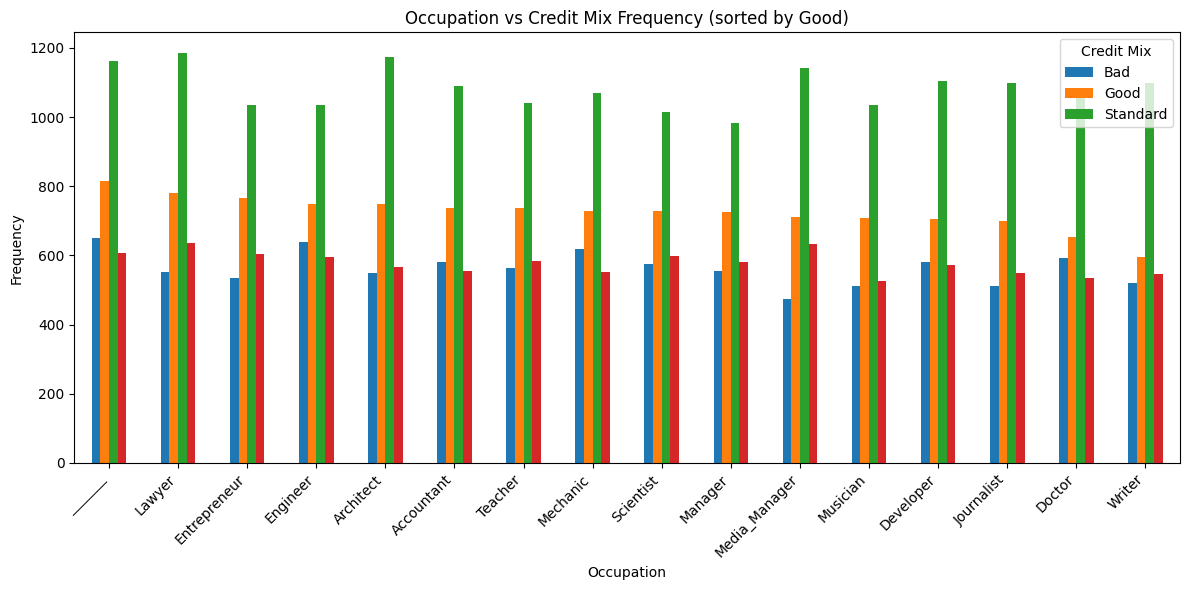

In [7]:
counts=dc.groupby(["Occupation","Credit_Mix"]).size().unstack(fill_value=0)

if "Good" in counts.columns:
    counts=counts.sort_values(by="Good", ascending=False)

counts.plot(kind="bar",figsize=(12,6))
plt.title("Occupation vs Credit Mix Frequency (sorted by Good)")
plt.xlabel("Occupation")
plt.ylabel("Frequency")
plt.legend(title="Credit Mix")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

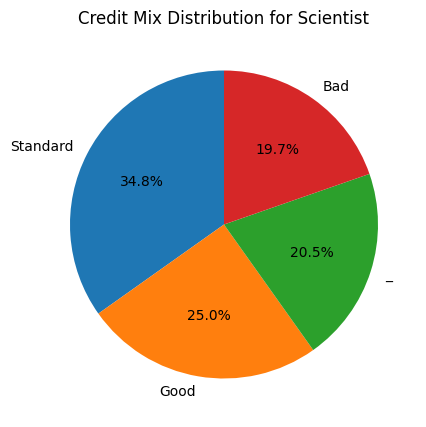

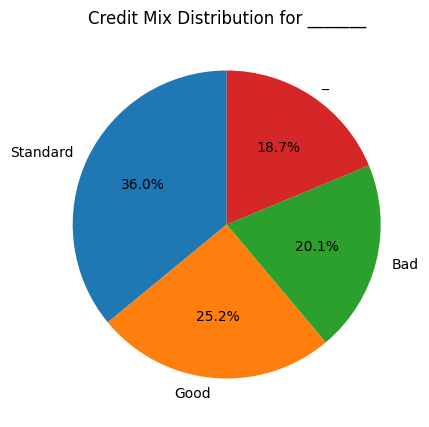

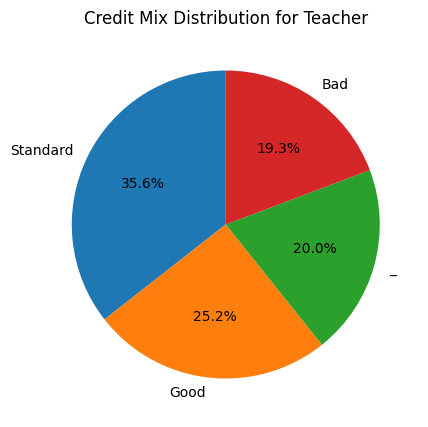

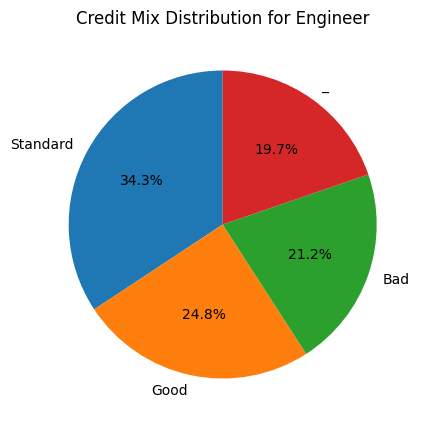

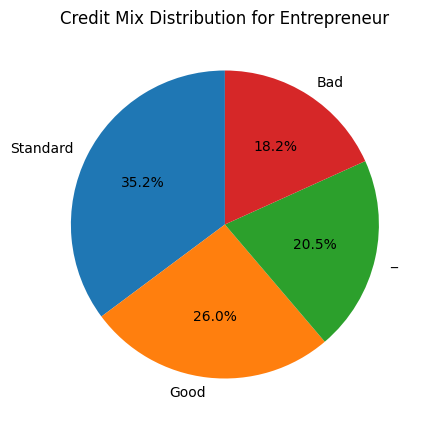

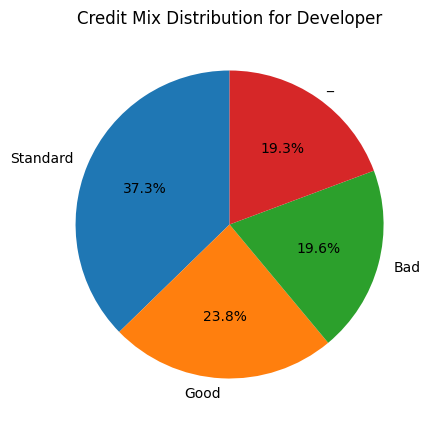

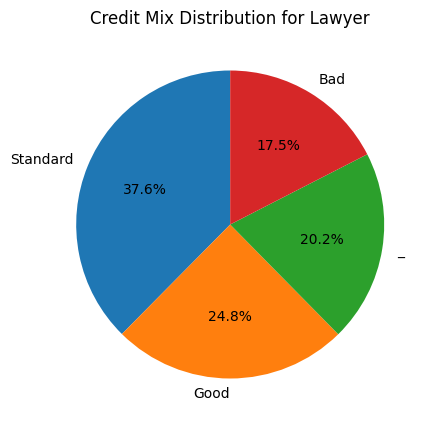

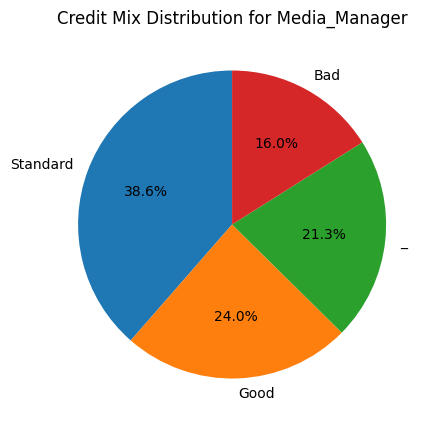

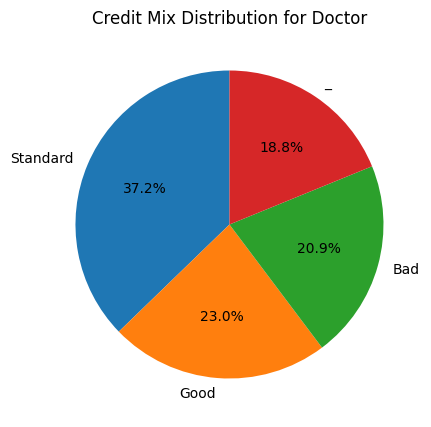

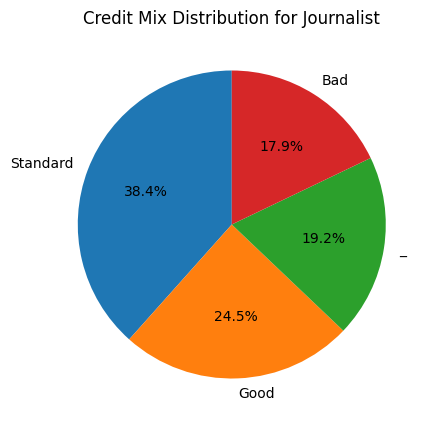

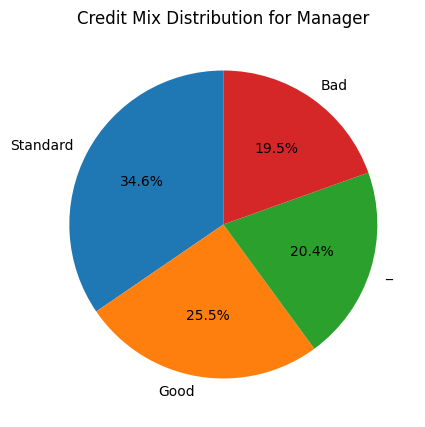

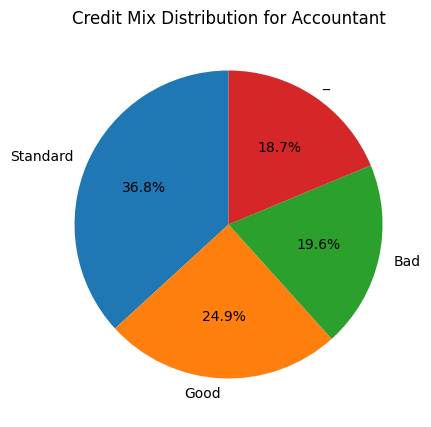

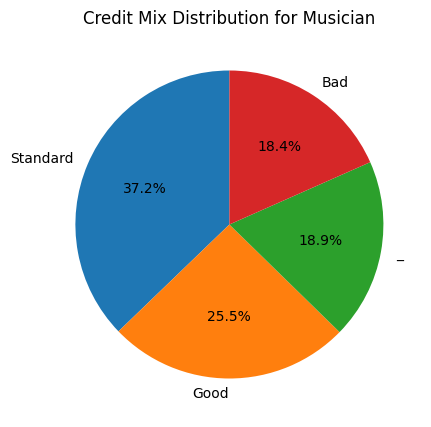

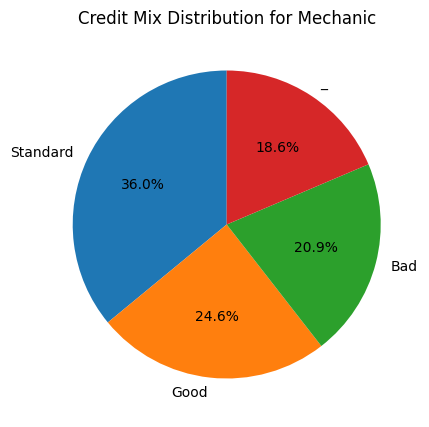

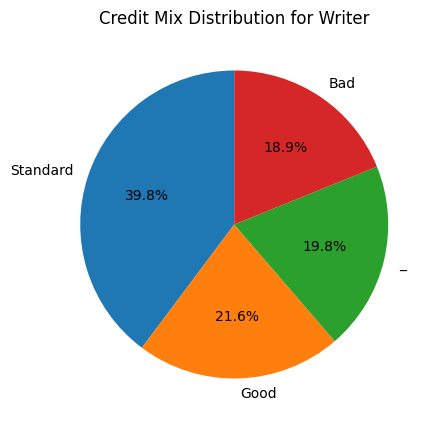

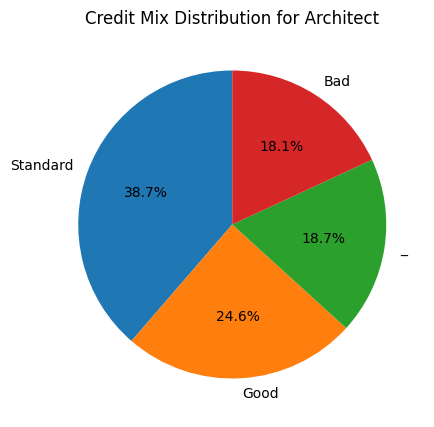

In [8]:
occupations=dc["Occupation"].unique()
for occ in occupations:
    subset = dc[dc["Occupation"] == occ]["Credit_Mix"].value_counts()
    
    plt.figure(figsize=(5,5))
    plt.pie(subset, labels=subset.index, autopct="%1.1f%%", startangle=90)
    plt.title(f"Credit Mix Distribution for {occ}")
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in dc.select_dtypes(include="object").columns:
    dc[col] = le.fit_transform(dc[col].astype(str))

In [12]:
corr = dc.corr(numeric_only=True)

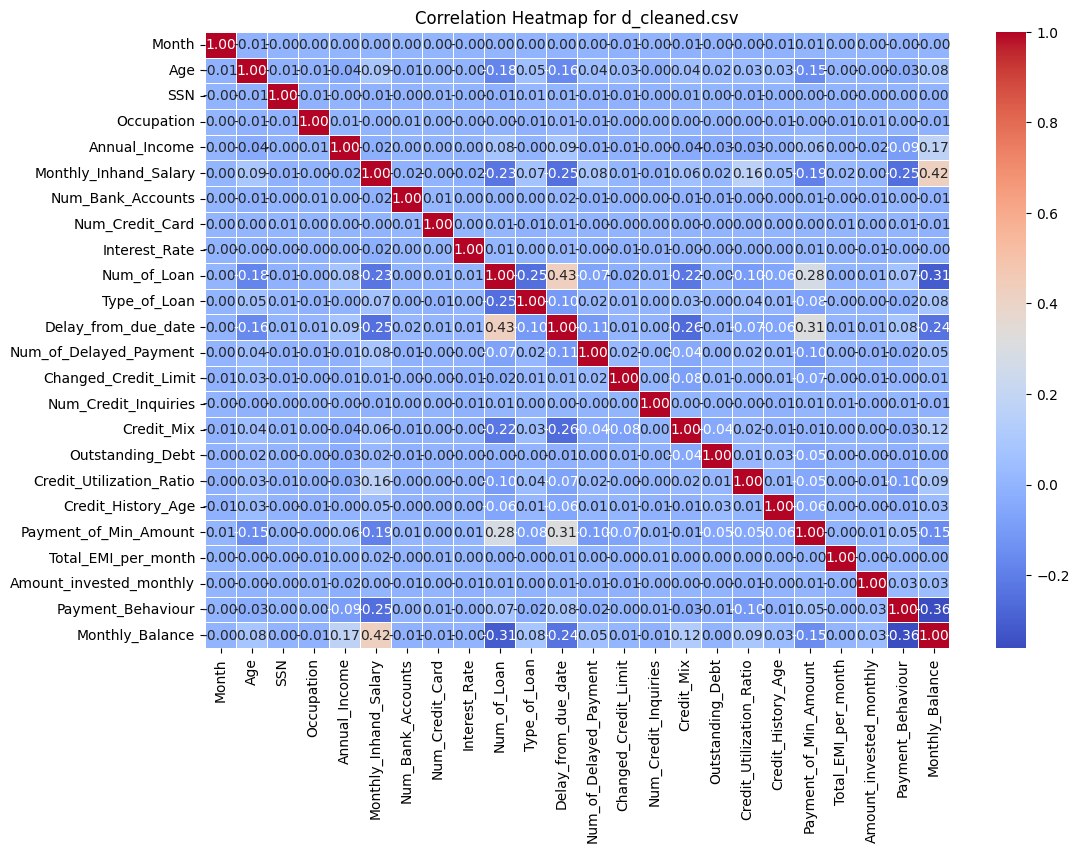

<Axes: >

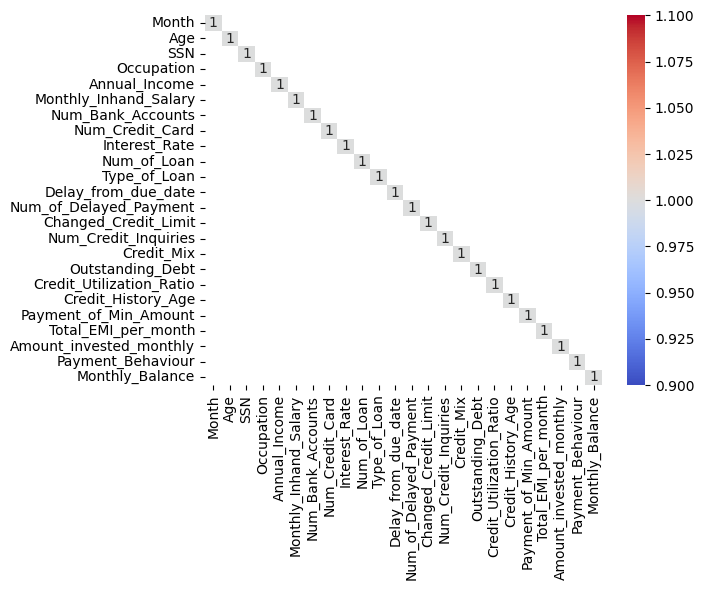

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for d_cleaned.csv")
plt.show()
sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.5)], annot=True, cmap="coolwarm")